In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the ggplot style
plt.style.use('ggplot')

In [2]:
# Load dataset from a CSV file.
drinks_menu = pd.read_csv('Nutrition facts for Starbucks Menu/starbucks-menu-nutrition-drinks.csv')

# Display the first few rows of the dataset.
drinks_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [3]:
# Display the basic information of the dataset.
drinks_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


* The dataset contains 177 rows and 7 columns.
* There are no missing values in the dataset.
* All columns are currently stored as objects, but numerical data should be represented as integers or floats.
* The column name 'Unnamed: 0' doesn't provide meaningful information, so rename the column 'Unnamed: 0' to 'Drinks'

In [4]:
# Rename the column 'Unnamed: 0' to 'Drinks'
drinks_menu.rename(columns={'Unnamed: 0': 'Drinks'}, inplace=True)

# Display the first few rows of the DataFrame
drinks_menu.head()

,Drinks,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [5]:
# Converts numeric columns to numeric data types. 
numeric_columns = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein','Sodium']
drinks_menu[numeric_columns] = drinks_menu[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the data types.
drinks_menu.dtypes

Drinks        object
Calories     float64
Fat (g)      float64
Carb. (g)    float64
Fiber (g)    float64
Protein      float64
Sodium       float64
dtype: object

In [6]:
# Check NaN values
drinks_menu.isnull().sum()

Drinks        0
Calories     85
Fat (g)      85
Carb. (g)    85
Fiber (g)    85
Protein      85
Sodium       85
dtype: int64

In [7]:
# Drop NaN values.
drinks_menu.dropna(inplace=True)

In [8]:
# Display the basic information of the dataset after dropping nan values. 
drinks_menu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drinks     92 non-null     object 
 1   Calories   92 non-null     float64
 2   Fat (g)    92 non-null     float64
 3   Carb. (g)  92 non-null     float64
 4   Fiber (g)  92 non-null     float64
 5   Protein    92 non-null     float64
 6   Sodium     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


#### Which drink has the highest and lowest calorie content?

In [9]:
# Display the maximum calorie content drink.
max_cal_drinks = drinks_menu[drinks_menu['Calories'] == drinks_menu['Calories'].max()]
max_cal_drinks

,Drinks,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
110,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0


In [10]:
# Display the min calorie content drink.
min_cal_drinks = drinks_menu[drinks_menu['Calories'] == drinks_menu['Calories'].min()]
min_cal_drinks

,Drinks,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
9,Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0
103,Nariño 70 Cold Brew with Milk,0.0,0.0,0.0,0.0,0.0,0.0


Starbucks drinks have a wide range of calorie content from zero-calorie options like Iced Coffee and Nariño 70 Cold Brew with Milk to higher-calorie options like Starbucks® Signature Hot Chocolate. 

Identifying the drinks with the highest and lowest calorie content is important for customers who want to manage their calorie intake or stick to specific dietary plans. This information helps customers make informed decisions when choosing drinks. 

#### What is the distribution of nutrients content among the drinks?

/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aysebusra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

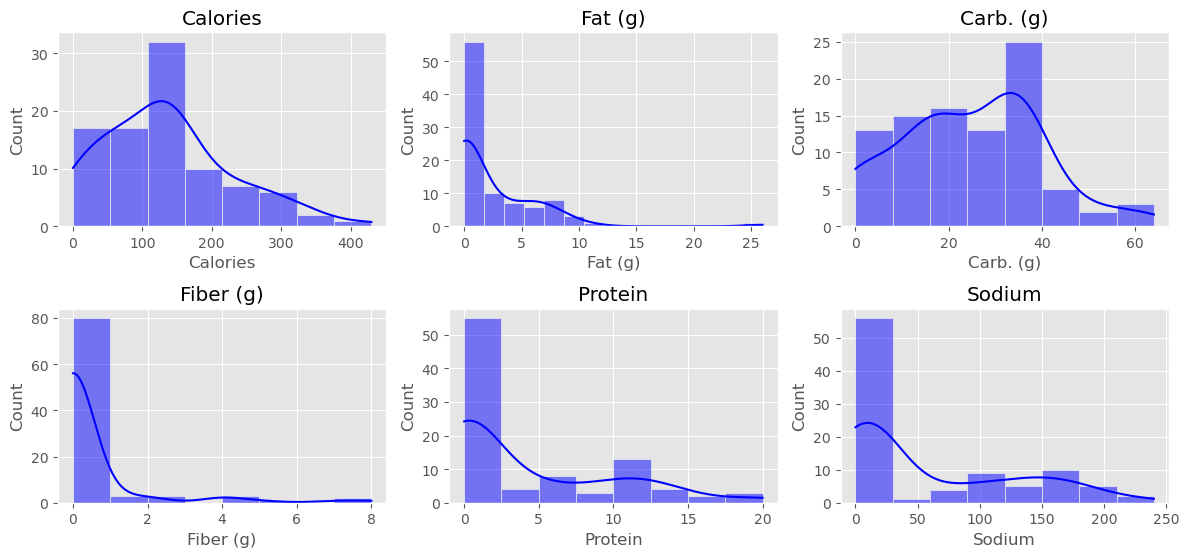

In [11]:
# Visualize the distribution of each nutrient among the drinks.
numeric_columns = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein','Sodium']

plt.figure(figsize = (12,8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3,  i+1)
    sns.histplot(data = drinks_menu, x=col, color='blue', kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

* The histogram reveals that the majority of drinks fall within the range of 0 to 200 calories, indicating Starbucks' diverse selection meeting various dietary preferences. However, some beverages have higher calorie content, which is important for customers monitoring their intake. Additionally, the presence of zero-calorie options provides healthier alternatives for calorie-conscious customers.

* Most drinks have low fat content, but there are exceptions with higher fat content. This offers choices for customers with different preferences.

* The majority of drinks have a moderate amount of carbohydrates, but some outliers have higher carbohydrate content. This accommodates customers with different carbohydrate needs.

* Most drinks have minimal fiber content, suitable for those seeking lower fiber options. However, some drinks offer higher fiber content, catering to individuals aiming to increase their fiber intake.

* Similar to fiber, most drinks contain minimal protein, suitable for those seeking lower protein options. However, some drinks offer higher protein content, providing options for individuals looking to increase their protein intake.

* Most drinks have minimal sodium content, making them suitable for those minimizing sodium intake. However, some drinks contain higher levels of sodium, so it's important for sodium-conscious customers to check the nutritional information.

In [12]:
# Display the summary statistics for each nutrient column.
drinks_menu.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,135.163043,2.336957,24.739130,0.445652,4.152174,57.934783
std,93.853554,3.887928,15.214849,1.417040,5.691588,68.384627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,14.750000,0.000000,0.000000,10.000000
50%,130.000000,0.000000,25.500000,0.000000,1.000000,15.000000
75%,190.000000,4.125000,35.000000,0.000000,8.250000,115.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


#### Which nutrients have the strongest correlations with calorie content?

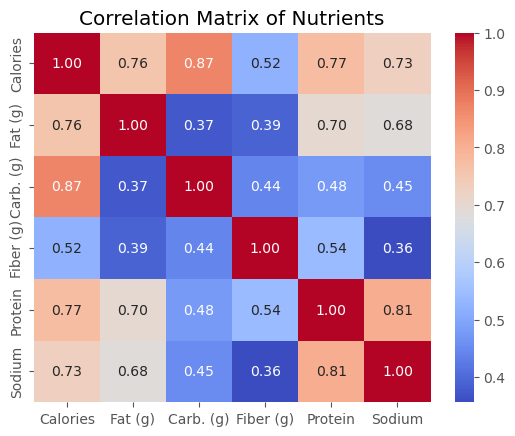

In [13]:
sns.heatmap(drinks_menu[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Nutrients')
plt.show()

There is a strong positive correlation between calorie content and fat content (0.76). This suggests that drinks with higher fat content tend to have higher calorie content, and vice versa.

There is a a very strong positive correlation between calorie content and carbohydrate content (0.87). This implies that drinks with higher carbohydrate content tend to have higher calorie content, and vice versa.

There is a moderate positive correlation between calorie content and fiber content (0.52). While the correlation is not as strong as with fat or carbohydrates, it suggests that drinks with higher fiber content may have slightly higher calorie content.

There is a strong positive correlation between calorie content and protein content (0.77). This suggests that drinks with higher protein content tend to have higher calorie content, and vice versa.

There is a strong positive correlation between calorie content and sodium content (0.73). This suggests that drinks with higher sodium content tend to have higher calorie content, and vice versa.

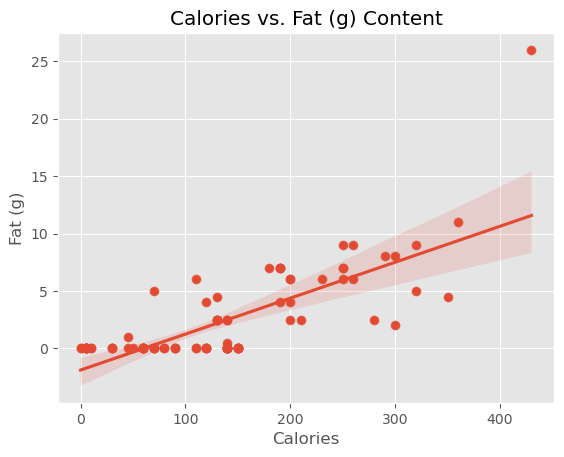

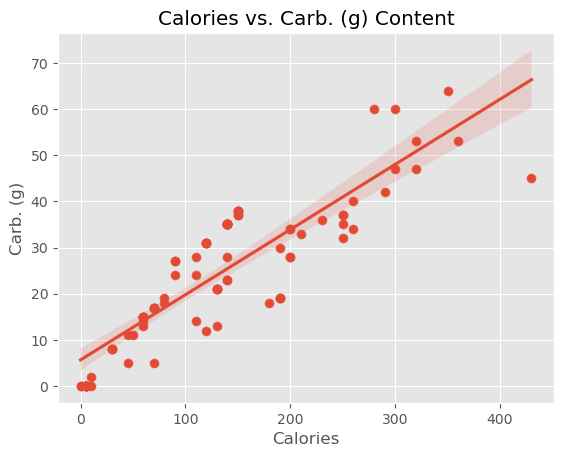

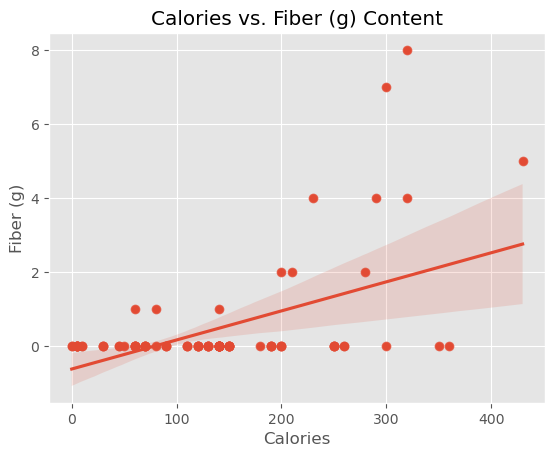

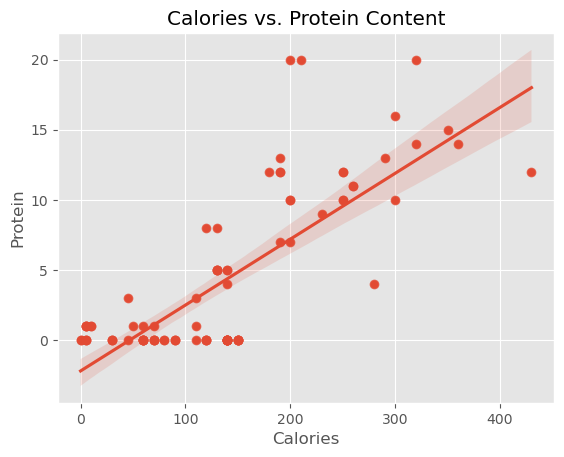

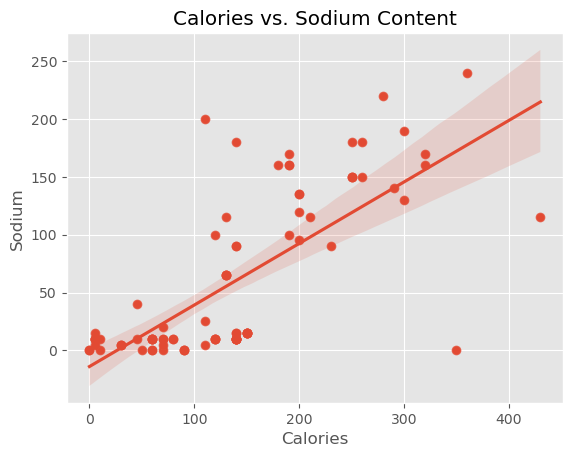

In [14]:
# Create scatter plots for each pair of variables. 
numeric_columns2 = ['Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']

for nutrient in numeric_columns2:
    sns.scatterplot(data=drinks_menu, x='Calories', y=nutrient)
    sns.regplot(data=drinks_menu, x='Calories', y=nutrient)
    plt.title(f'Calories vs. {nutrient} Content')
    plt.xlabel('Calories')
    plt.ylabel(f'{nutrient}')
    plt.show()

The highest correlation is found between calorie and carbohydrates, indicating a strong positive relationship where drinks with higher carbohydrate content tend to have higher calorie content. On the other hand, the lowest correlation is observed between calorie and fiber, suggesting a weaker association between these two variables compared to others.

#### Are there any outlier drinks with unusually high or low nutritional values?

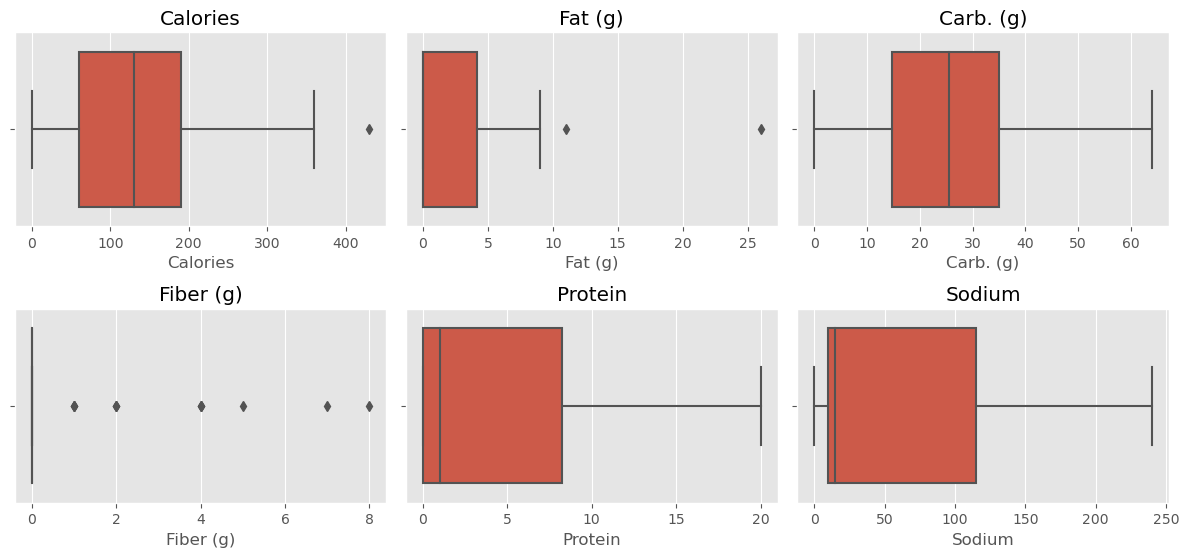

In [15]:
numeric_columns = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein','Sodium']
 
plt.figure(figsize = (12,8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3,  i+1)
    sns.boxplot(data = drinks_menu, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

The box plots show that some drinks stand out due to their calorie, fat, and fiber content. These outliers represent drinks with higher values compared to the majority.

For calories, high outliers suggest some drinks are much higher in calories, possibly due to added ingredients or specialty recipes. In the case of fat content, outliers indicate beverages with high fat values, like creamy drink. Similarly, fiber outliers highlight drinks with significantly higher fiber content, potentially from added supplements or natural ingredients.